In [1]:
import pandas as pd
df = pd.read_csv("datasets/table_sign_training.csv")


train_samples = df.iloc[:, :42].values
train_labels = df.iloc[:, -5:].values

In [4]:
import quark

ff_model = quark.Model("IterativeFeedForward")

ff_sample = train_samples.tolist()
ff_labels = train_labels.tolist()

ff_l1 = quark.Layer("Gradient", 10, 41, 0.01, "Sigmoid", 1, True)
ff_l2 = quark.Layer("Gradient", 5, 10, 0.01, "Sigmoid", 1, True)
ff_model.push_layer(ff_l1)
ff_model.push_layer(ff_l2)

ff_model.fit(ff_sample, ff_labels, 500, 0.001)

Minimum atteint: 0.010075118289796651


Text(0, 0.5, 'Mean Square Error')

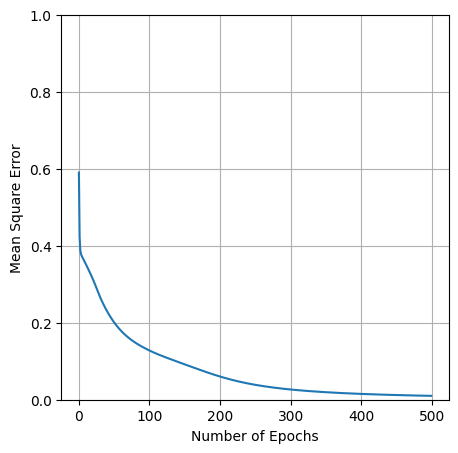

In [5]:
import matplotlib.pyplot as plt

mse = ff_model.mse
print(f"Minimum atteint: {min(mse)}")
len(mse)

plt.figure(figsize=(5, 5))
plt.plot(range(len(mse)), mse)
plt.ylim(0, 1)
plt.grid()

plt.xlabel("Number of Epochs")
plt.ylabel("Mean Square Error")

# Result validation

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("datasets/table_sign_validation.csv")


validation_samples = df.iloc[:, :42].values.tolist()
validation_labels = df.iloc[:, -5:].values.tolist()

success_count = 0

for i, sample in enumerate(validation_samples):
    if np.argmax(ff_model.predict(sample), axis=0) == np.argmax(validation_labels[i], axis=0):
        success_count += 1

print(f"Model precision {(success_count / len(validation_samples)) * 100}%")

Model precision 100.0%


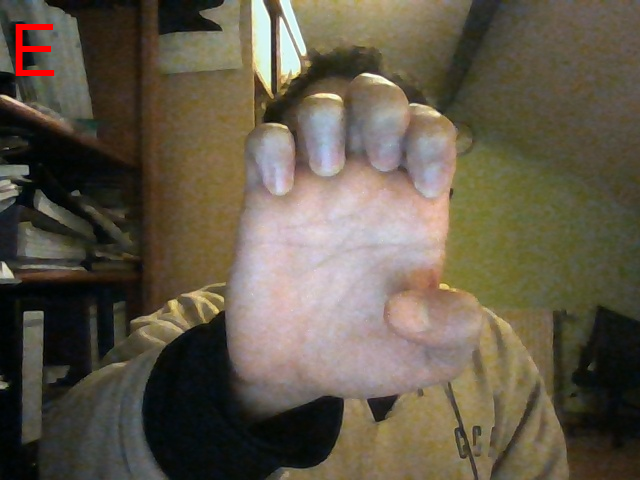

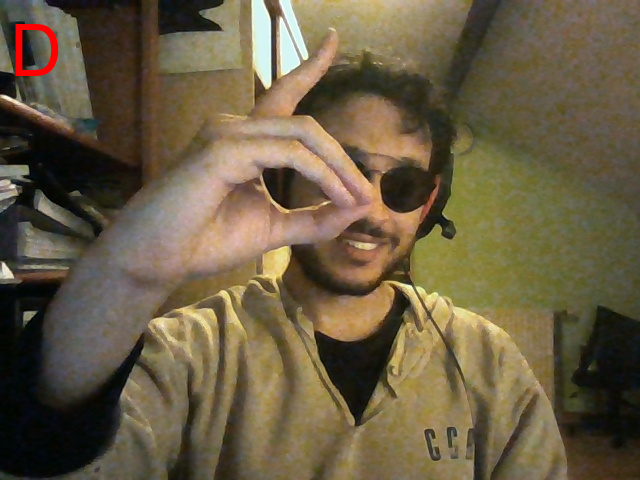

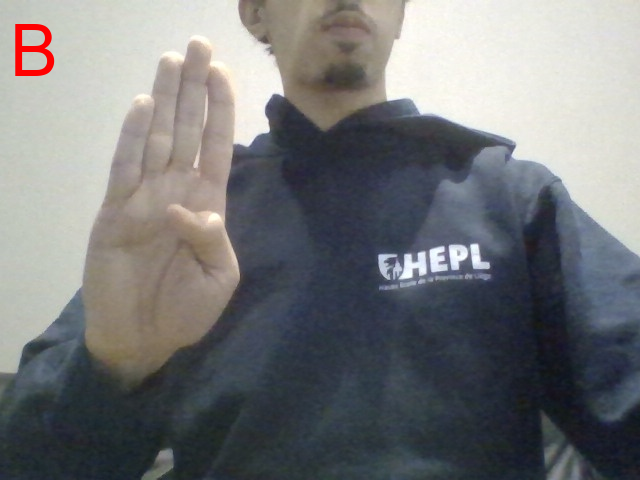

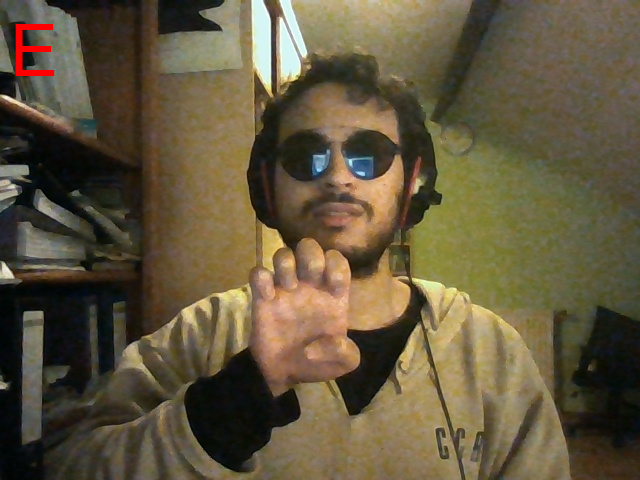

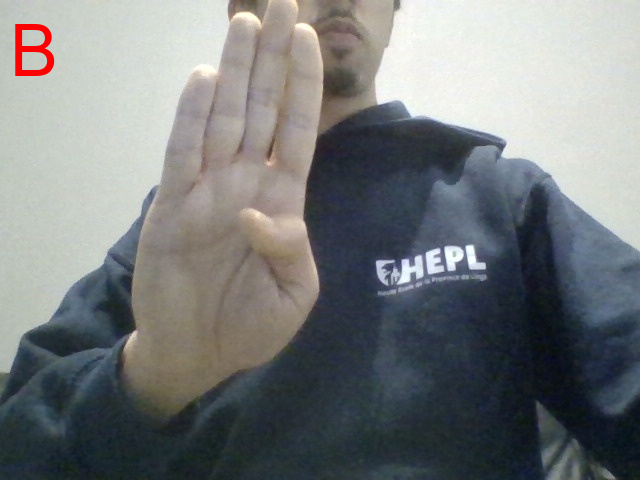

In [8]:
from io import BytesIO
import random
from IPython.display import Image, HTML
from PIL import Image, ImageDraw, ImageFont

df = pd.read_csv("datasets/table_sign_complete.csv")

complete_sample = df.iloc[:, :42].values.tolist()

def translate_image(idx: int):
    image_src = f"""datasets/images/{idx + 1}.jpg"""
    a = ord('A')
    letter = chr(a + np.argmax(ff_model.predict(complete_sample[idx]), axis=0))

    image = Image.open(image_src)
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype("arial.ttf", 72)
    draw.text((10, 10), letter, fill="red", font=font)
    display(image)

#for index in range(len(complete_sample)):

for index in random.choices(range(0, len(complete_sample)), k=5):
    translate_image(index)